In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, ifft

filename = 'SpinEcho/5.csv'
# filename = 'polar_time/10_0.csv' # ch 2 !!
 
with open(filename) as f:
    reader = csv.reader(f, delimiter = ',')
    header = next(reader)
    times, ch1, ch2, ch3 = [], [], [], []
    for row in reader:
        times.append(float(row[0]))
        ch1.append(float(row[1]))

times = np.array(times)
ch1 = np.array(ch1)
start = -3.
end = 3.

range = np.where((times >= start)*(times <= end))
times = times[range]
ch1 = ch1[range]
plt.plot(times, ch1)

* 原始數據 $(ch1, t)$
* FFT $(x_f, |y_f|)$
* filtered_FFT
* filtered_signal

In [2]:
times = np.array(times)
ch1 = np.array(ch1)
start = -3.
end = 3.

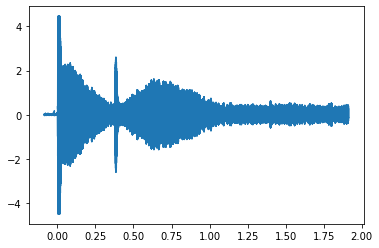

In [3]:
range = np.where((times >= start)*(times <= end))
times = times[range]
ch1 = ch1[range]
plt.plot(times, ch1)

peak: 2033.1864390705914


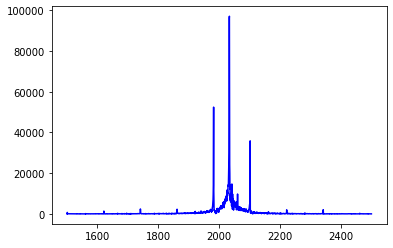

In [41]:
dt = np.average(np.diff(times))
N = len(times)
yf = fft(ch1)
xf = fftfreq(N, dt)

mask = np.where((1500. <= xf)*(xf <= 2500.))
plt.plot(xf[mask], np.abs(yf[mask]), linestyle='-', color='blue')
print(f'peak: {xf[mask][np.argmax(np.abs(yf[mask]))]}')

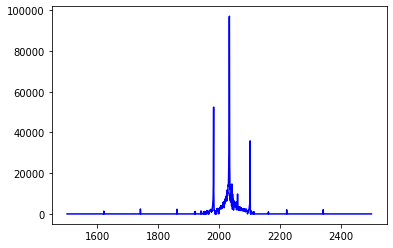

In [42]:


yf[np.abs(yf) < 0.01*np.max(np.abs(yf))] = 0
plt.plot(xf[mask], np.abs(yf[mask]), linestyle='-', color='blue')

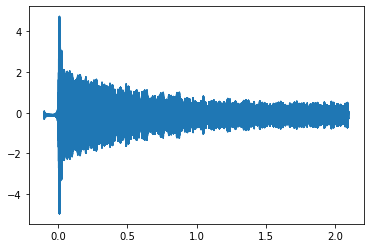

In [43]:
filtered_signal = ifft(yf)
plt.plot(times, np.real(filtered_signal))

In [44]:
# mask = np.where((2150. <= xf)*(xf <= 2170.))
# ymask = yf
# #ymask[mask] = ymask[mask]-yf[mask]
# mask = np.where((-2150. >= xf)*(xf >= -2170.))
# #ymask[mask] = ymask[mask]-yf[mask]
# mask = np.where((-1000. <= xf)*(xf <= 1000.))
# ymask[mask] = ymask[mask]-yf[mask]
# plt.plot(xf, 2/N*np.abs(ymask), linestyle='-', color='blue')